# Decision Tree vs Random Forest Analysis

## Introduction

In this notebook, we will explore two popular tree-based machine learning algorithms: **Decision Tree** and **Random Forest**. The objectives of this analysis are to:

1. Train a **Decision Tree Classifier** and visualize the tree structure.  
2. Analyze potential **overfitting** in Decision Trees and control it by adjusting tree depth.  
3. Train a **Random Forest Classifier** and compare its performance with the Decision Tree.  
4. Interpret **feature importances** to understand which features influence predictions the most.  
5. Evaluate model performance using **cross-validation** for a robust assessment.

We will use a clean, preprocessed dataset for this analysis, ensuring that all features are ready for model training. Visualizations and metrics will be provided to facilitate a clear understanding of each model’s behavior and performance.


## 1. Importing Libraries

In this step, we import all necessary Python libraries for our analysis:

- **pandas** and **numpy**: for data manipulation and numerical operations.  
- **scikit-learn modules**: for model training, evaluation, and cross-validation.  
  - `DecisionTreeClassifier` and `RandomForestClassifier` for building tree-based models.  
  - `train_test_split` to split the dataset into training and testing sets.  
  - `cross_val_score` for evaluating model performance via cross-validation.  
  - `accuracy_score` and `confusion_matrix` for model evaluation metrics.  
- **matplotlib** and **seaborn**: for creating visualizations such as plots and heatmaps.  

These imports set up the environment to train, evaluate, and visualize both Decision Tree and Random Forest classifiers.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## 2. Loading and Preparing the Dataset

- We load the preprocessed **Heart Disease dataset** into a pandas DataFrame.  
- Separate the dataset into **features (`X`)** and **target (`y`)**.  
- Split the data into **training** and **testing** sets using an 80-20 split:  
  - `X_train`, `y_train` for training the models.  
  - `X_test`, `y_test` for evaluating model performance.  
- We use `stratify=y` to ensure the class distribution remains consistent in both training and testing sets.  

This step ensures our models have properly prepared data for training and evaluation.


In [2]:
df = pd.read_csv("datasets/heart-clean.csv")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Training and Visualizing a Decision Tree

- Initialize a **Decision Tree Classifier** with a fixed random state for reproducibility.  
- Train the model using the **training dataset** (`X_train`, `y_train`).  
- Visualize the structure of the trained Decision Tree using `plot_tree`:  
  - Feature names are shown on the nodes to indicate the splitting criteria.  
  - Class names represent the target classes: `No Heart Disease` and `Heart Disease`.  
  - Nodes are color-filled and rounded for better readability.  
- Save the visualization to the `plots_dr` folder for reference.  

This visualization helps understand **how the Decision Tree makes predictions** based on feature splits.


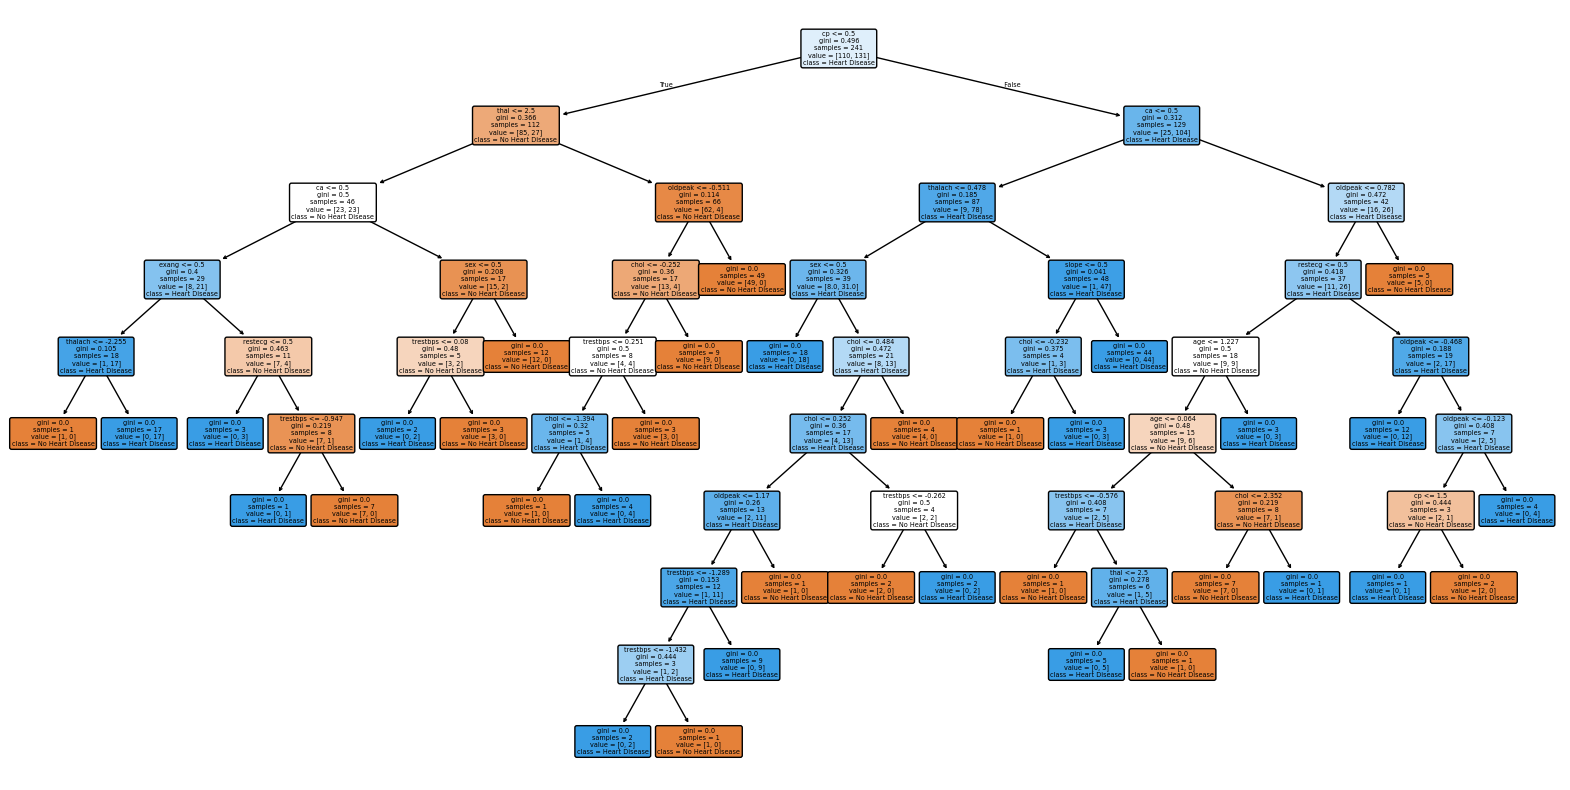

In [3]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.savefig("plots/plots_dr/DecisionTree.png")
plt.show()


## 4. Evaluating the Decision Tree

- Use the trained Decision Tree to **predict** on the test set (`X_test`).  
- Calculate the **accuracy** of the model to measure overall performance.  
- Generate a **confusion matrix** to understand the distribution of true positives, true negatives, false positives, and false negatives.  
- Visualize the confusion matrix using a heatmap for clarity:  
  - Annotated with counts for each category.  
  - Axes labeled as `Actual` vs `Predicted`.  
- Save the heatmap to the `plots_dr` folder for reference.  

This step helps identify **how well the Decision Tree predicts** heart disease and highlights any misclassifications.


Decision Tree Accuracy: 0.8033
Confusion Matrix:


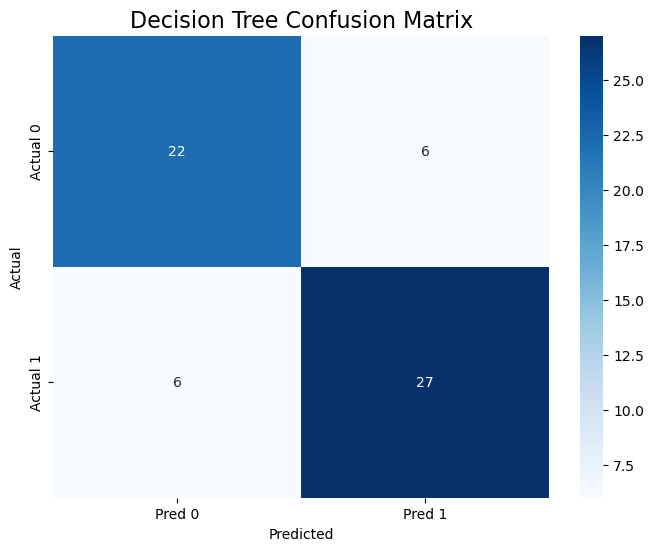

In [4]:
y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
dt_cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Decision Tree Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("plots/plots_dr/Decision Tree Confusion Matrix.png")
plt.show()

## 5. Analyzing Overfitting and Controlling Tree Depth

- Train **Decision Trees with varying depths** from 1 to 10.  
- Record both **training accuracy** and **testing accuracy** for each depth.  
- Plot **Train vs Test Accuracy** to identify overfitting or underfitting:  
  - High training accuracy but low testing accuracy indicates **overfitting**.  
  - Low accuracy on both sets indicates **underfitting**.  
- This analysis helps select an **optimal tree depth** that balances bias and variance.  
- The resulting plot is saved to the `plots_dr` folder for future reference.


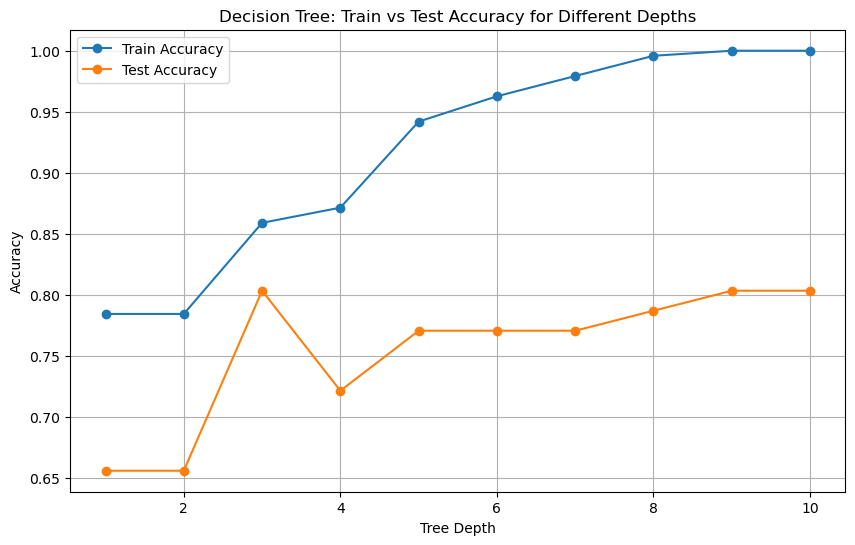

In [5]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Train vs Test Accuracy for Different Depths')
plt.legend()
plt.grid(True)
plt.savefig("plots/plots_dr/Decision Tree: Train vs Test Accuracy for Different Depths.png")
plt.show()


## 6. Tuned Decision Tree

- Select the **best tree depth** based on the maximum test accuracy from the previous analysis.  
- Train a **Decision Tree with the optimal depth** to reduce overfitting while maintaining high performance.  
- Predict on the test set and calculate **accuracy**.  
- Generate and visualize the **confusion matrix** using a heatmap for clarity:  
  - Annotated with counts.  
  - Axes labeled as `Actual` vs `Predicted`.  
- Save the tuned model’s heatmap to the `plots_dr` folder.  

This step demonstrates how **hyperparameter tuning (tree depth)** improves the generalization of the Decision Tree.


Tuned Decision Tree (max_depth=3) Accuracy: 0.8033
Confusion Matrix:


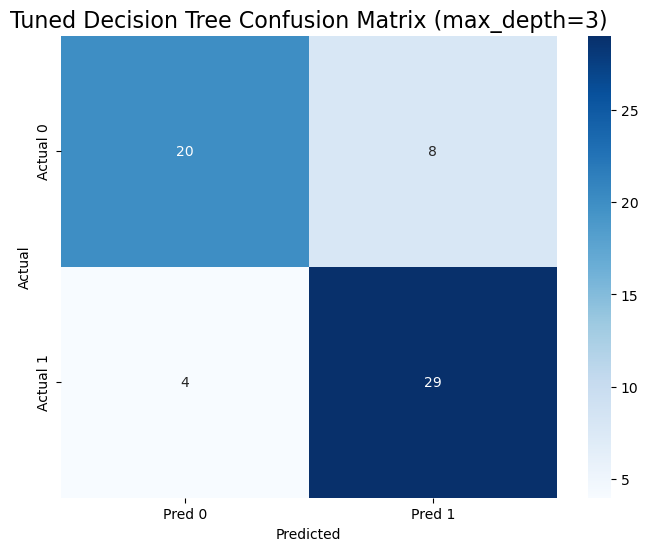

In [6]:
best_depth = test_acc.index(max(test_acc)) + 1
dt_model_tuned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_model_tuned.fit(X_train, y_train)

y_pred_tuned = dt_model_tuned.predict(X_test)
dt_tuned_acc = accuracy_score(y_test, y_pred_tuned)
dt_tuned_cm = confusion_matrix(y_test, y_pred_tuned)

print(f"Tuned Decision Tree (max_depth={best_depth}) Accuracy: {dt_tuned_acc:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(dt_tuned_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Tuned Decision Tree Confusion Matrix (max_depth={best_depth})', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("plots/plots_dr/Tuned Decision Tree Confusion Matrix.png")
plt.show()

## 7. Interpreting Feature Importances

- Extract the **feature importances** from the tuned Decision Tree to understand which features contribute most to predictions.  
- Sort and visualize the importances in a **bar chart**.  
- This helps identify the most influential features for predicting heart disease.  
- Save the plot to the `plots_dr` folder for reference.  

Understanding feature importance allows us to **gain insights into the model’s decision-making process** and the relative impact of each feature.


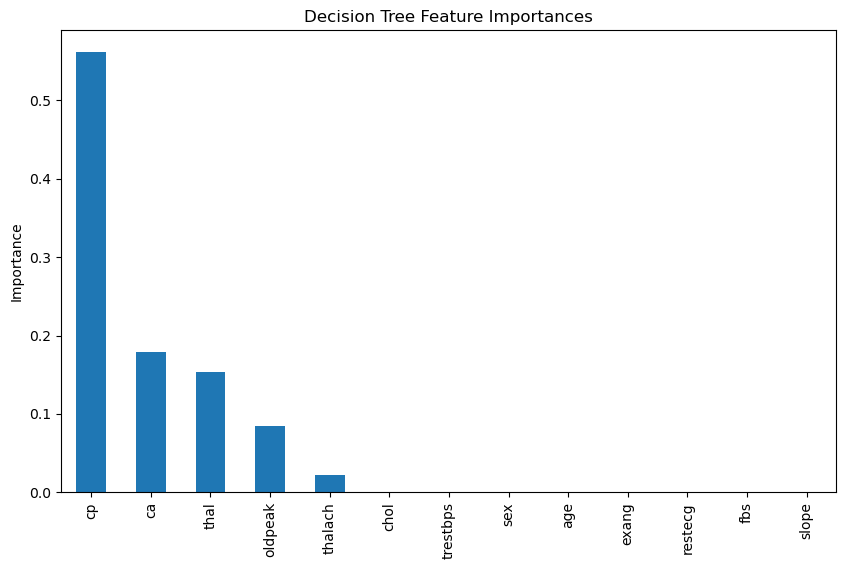

In [7]:
feature_importances = pd.Series(dt_model_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Decision Tree Feature Importances')
plt.ylabel('Importance')
plt.savefig("plots/plots_dr/Decision Tree Feature Importances.png")
plt.show()

## 8. Random Forest: Training and Evaluation

- Perform **5-fold cross-validation** on the tuned Decision Tree to assess its robustness.  
- Train a **Random Forest Classifier** using the previously determined optimal depth and 100 estimators.  
- Predict on the test set and calculate **accuracy**.  
- Generate a **confusion matrix** for the Random Forest predictions and visualize it using a heatmap:  
  - Annotated with counts.  
  - Axes labeled as `Actual` vs `Predicted`.  
- Save the confusion matrix to the `plots_dr` folder for future reference.  

This step allows a **direct comparison between Decision Tree and Random Forest**, highlighting improvements in accuracy and robustness with ensemble methods.


In [8]:
cv_scores = cross_val_score(dt_model_tuned, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Decision Tree 5-Fold CV Accuracy: 0.7946 ± 0.0707


Random Forest Accuracy: 0.7705
Confusion Matrix:


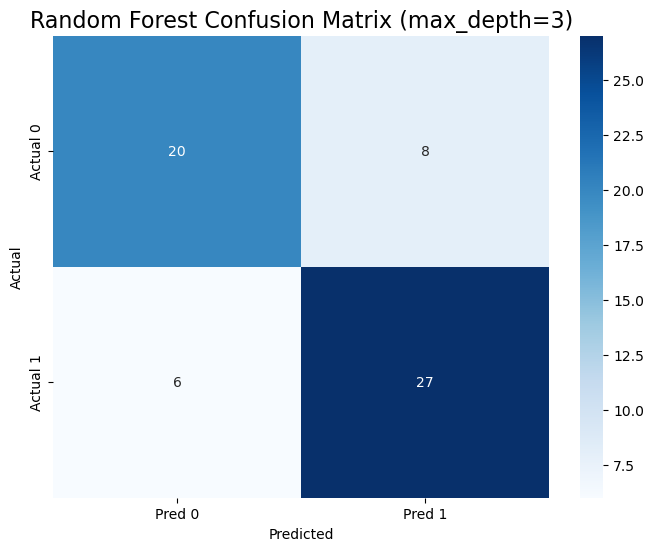

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=best_depth, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Random Forest Confusion Matrix (max_depth={best_depth})', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("plots/plots_dr/Random Forest Confusion Matrix.png")
plt.show()

## 9. Random Forest Feature Importances

- Extract and sort the **feature importances** from the trained Random Forest.  
- Visualize the importances using a **bar chart** to see which features contribute most to the model’s predictions.  
- Save the plot to the `plots_dr` folder for reference.  

Comparing feature importances between the Decision Tree and Random Forest provides insight into how **ensemble methods distribute importance across features**.


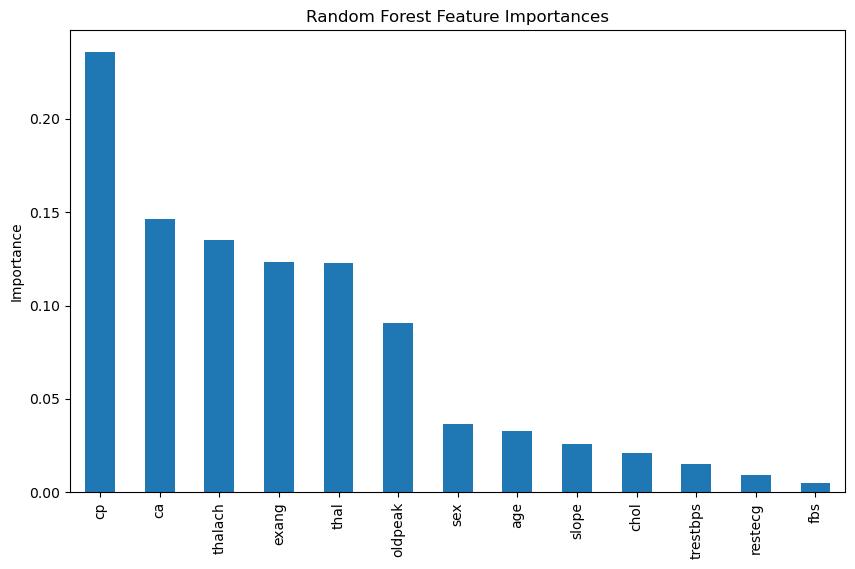

In [10]:
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
rf_feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance')
plt.savefig("plots/plots_dr/Random Forest Feature Importances.png")
plt.show()

## 10. Comparing Decision Tree and Random Forest

- Evaluate the **tuned Decision Tree** and **Random Forest** using **5-fold cross-validation** to assess model stability and generalization.  
- Compare the **test set accuracies** of both models with a line chart.  
- Compare the **cross-validation accuracies** with a separate line chart.  
- Save both plots to the `plots_dr` folder for reference.  

This comparison highlights the **performance gains from using Random Forest** as an ensemble method and provides a clear visual of accuracy differences between the models.


In [11]:
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold CV Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

Random Forest 5-Fold CV Accuracy: 0.8443 ± 0.0545


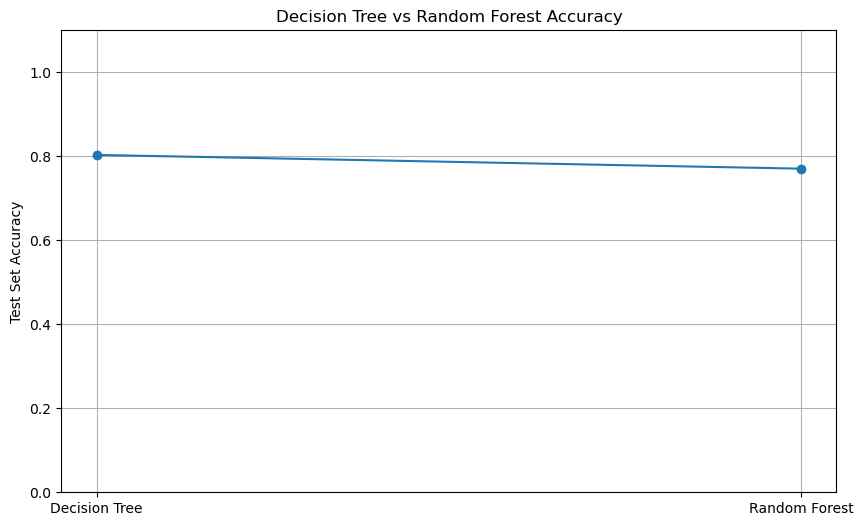

In [12]:
plt.figure(figsize=(10,6))
plt.plot(['Decision Tree', 'Random Forest'], [dt_tuned_acc, rf_acc], marker='o')
plt.ylim(0, 1.1)
plt.ylabel('Test Set Accuracy')
plt.title('Decision Tree vs Random Forest Accuracy')
plt.grid(True)
plt.savefig("plots/plots_dr/Decision Tree vs Random Forest Accuracy.png")
plt.show()

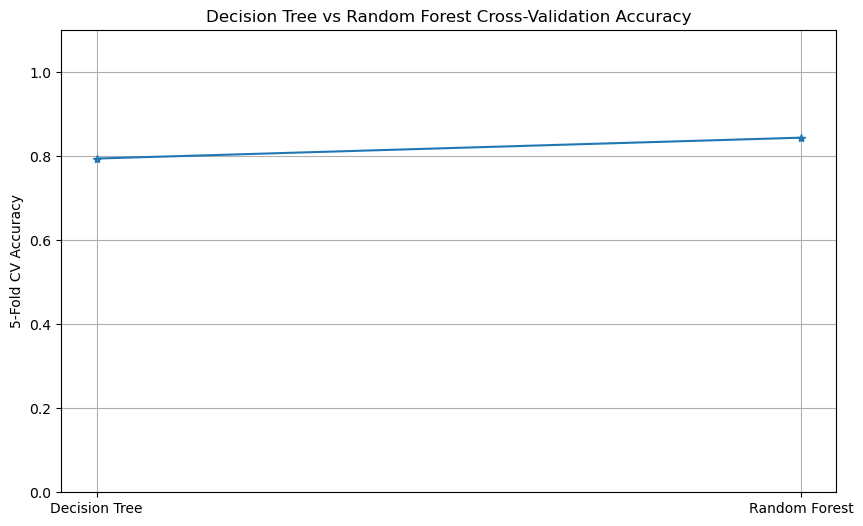

In [13]:
plt.figure(figsize=(10,6))
plt.plot(['Decision Tree', 'Random Forest'], [cv_scores.mean(), cv_scores_rf.mean()], marker='*')
plt.ylim(0, 1.1)
plt.ylabel('5-Fold CV Accuracy')
plt.title('Decision Tree vs Random Forest Cross-Validation Accuracy')
plt.grid(True)
plt.savefig("plots/plots_dr/Decision Tree vs Random Forest Cross-Validation Accuracy.png")
plt.show()

In [14]:
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Test Accuracy': [dt_tuned_acc, rf_acc],
    'CV Accuracy': [cv_scores.mean(), cv_scores_rf.mean()]
})

comparison_df


,Model,Test Accuracy,CV Accuracy
0,Decision Tree,0.803279,0.794590
1,Random Forest,0.770492,0.844317


## 11. Feature Importance Comparison

- Compare **feature importances** between the **tuned Decision Tree** and **Random Forest** side by side.  
- Create a **grouped bar chart** to visualize how each model weights the features differently.  
- Save the plot to the `plots_dr` folder for reference.  

This comparison provides insights into how ensemble methods like Random Forest may **distribute importance more evenly** across features compared to a single Decision Tree.


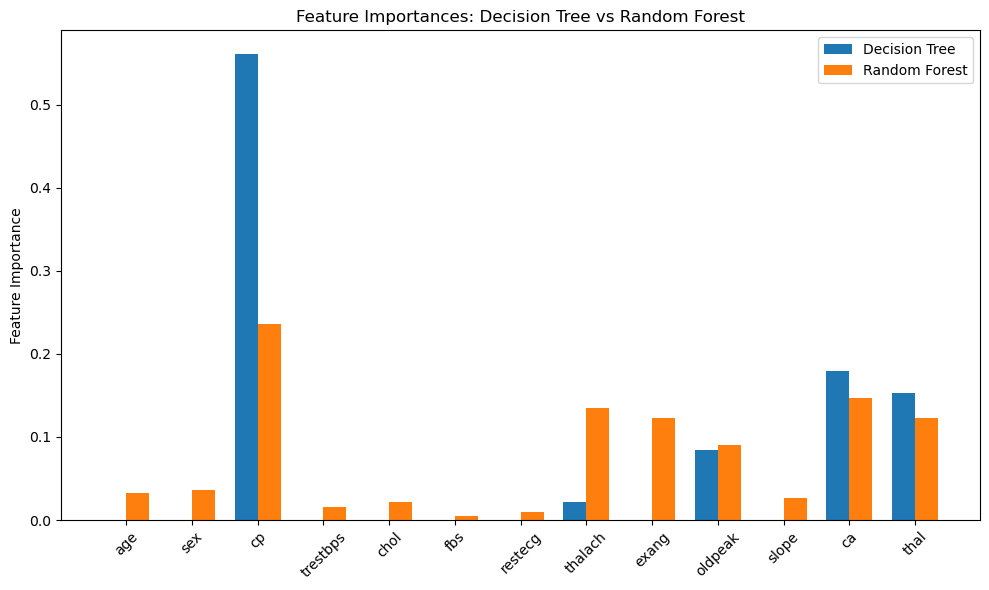

In [15]:
plt.figure(figsize=(10,6))
x = np.arange(len(X.columns))
width = 0.35

plt.bar(x - width/2, dt_model_tuned.feature_importances_, width, label='Decision Tree')
plt.bar(x + width/2, rf_model.feature_importances_, width, label='Random Forest')
plt.xticks(x, X.columns, rotation=45)
plt.ylabel('Feature Importance')
plt.title('Feature Importances: Decision Tree vs Random Forest')
plt.legend()
plt.tight_layout()
plt.savefig("plots/plots_dr/Feature Importances: Decision Tree vs Random Forest.png")
plt.show()

In [17]:
joblib.dump(dt_model, "models/models_dr/DecisionTree_Default.pkl")
joblib.dump(dt_model_tuned, f"models/models_dr/DecisionTree_Tuned_maxdepth{best_depth}.pkl")
joblib.dump(rf_model, f"models/models_dr/RandomForest_maxdepth{best_depth}.pkl")

['models/models_dr/RandomForest_maxdepth3.pkl']

## 12. Conclusion

- The **Decision Tree** provides a clear and interpretable model, showing how specific feature splits lead to predictions. However, it can **overfit** if the depth is too high.  
- By tuning the tree depth, we improved the Decision Tree’s generalization and obtained a reasonable balance between training and testing accuracy.  
- The **Random Forest** outperformed the Decision Tree in both **test set accuracy** and **cross-validation scores**, demonstrating the power of ensemble methods to reduce variance and improve robustness.  
- Feature importance analysis revealed that certain features consistently influenced predictions across both models, while Random Forest distributed importance more evenly, capturing interactions between features.  
- Overall, this notebook illustrates the trade-offs between interpretability and performance in tree-based models, and highlights the benefits of using Random Forest for more stable and accurate predictions.


---